<a href="https://colab.research.google.com/github/NazihaCode/Card-Extraction-Data/blob/master/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **La classification de documents d'identité**

In [40]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [37]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive'

In [12]:
cd 'Card_extraction_Data/'

/content/drive/MyDrive/Card_extraction_Data


In [5]:
cd 'BID Dataset'

/content/drive/MyDrive/Card_extraction_Data/BID Dataset


## **Example de documents à classifier**

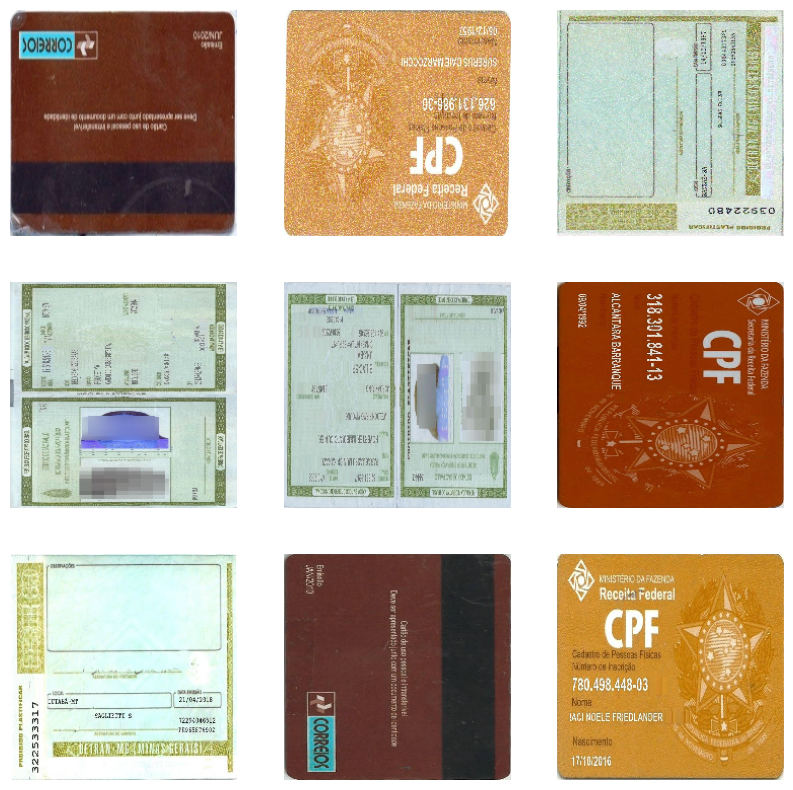

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(train_data[750 *i])
        plt.axis("off")
    

In [13]:
#Generate a Dataset
data_dir = "./BID Dataset/"
class_names = ['CPF_Frente', 'CPF_Verso', 'CNH_Aberta', 'CNH_Frente', 'CNH_Verso', 'RG_Aberto', 'RG_Frente', 'RG_Verso']

# Load the images and labels into numpy arrays
data = []
labels = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        if img_path.endswith('_in.jpg'):
            img = cv2.imread(img_path)
            # Convert to grayscale
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (64, 64)) # Resize the image to a standard size
            # Normalize pixel values
            img = img / 255.0
            data.append(img)
            labels.append(class_names.index(class_name))
data = np.array(data)
labels = np.array(labels)

In [14]:
data.shape

(21591, 64, 64)

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


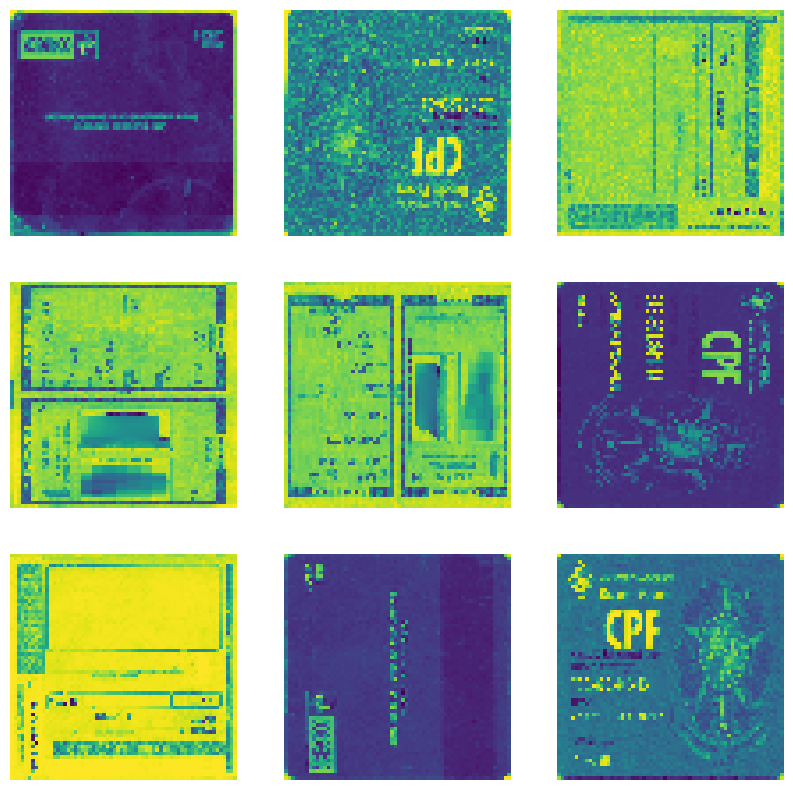

In [21]:
plt.figure(figsize=(10, 10))
for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(train_data[750 *i])
        plt.axis("off")

In [29]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (1, 1), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (1, 1), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (1, 1), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 128)       

In [30]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(train_data, train_labels, epochs= 200, validation_data=(test_data, test_labels))

Epoch 1/200
540/540 [==============================] - 67s 120ms/step - loss: 1.1331 - accuracy: 0.5407 - val_loss: 0.3584 - val_accuracy: 0.9379
Epoch 2/200
540/540 [==============================] - 69s 127ms/step - loss: 0.3866 - accuracy: 0.8698 - val_loss: 0.1880 - val_accuracy: 0.9435
Epoch 3/200
540/540 [==============================] - 64s 118ms/step - loss: 0.2584 - accuracy: 0.9118 - val_loss: 0.1070 - val_accuracy: 0.9648
Epoch 4/200
540/540 [==============================] - 70s 129ms/step - loss: 0.2149 - accuracy: 0.9258 - val_loss: 0.0868 - val_accuracy: 0.9722
Epoch 5/200
540/540 [==============================] - 65s 121ms/step - loss: 0.1796 - accuracy: 0.9393 - val_loss: 0.0636 - val_accuracy: 0.9801
Epoch 6/200
540/540 [==============================] - 66s 123ms/step - loss: 0.1595 - accuracy: 0.9459 - val_loss: 0.0678 - val_accuracy: 0.9785
Epoch 7/200
540/540 [==============================] - 69s 128ms/step - loss: 0.1438 - accuracy: 0.9519 - val_loss: 0.0511 -

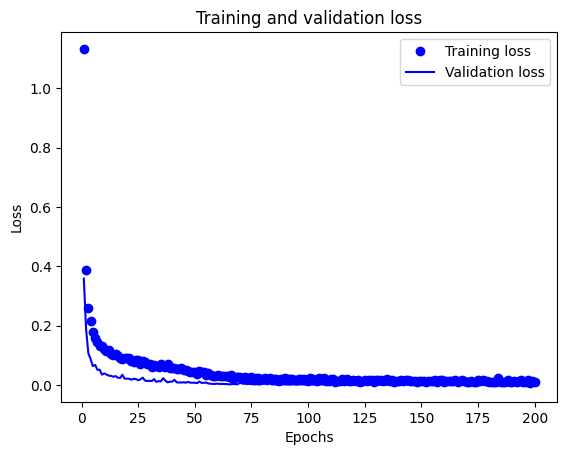

In [32]:
from matplotlib import pyplot as plt
# Plot the training and validation losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

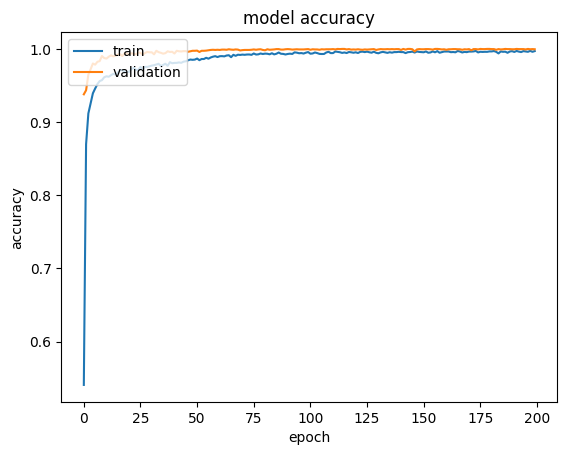

In [39]:
import matplotlib.pyplot as plt


def plot_hist(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(history)

In [ ]:
# Exporting model
import pickle
pickle.dump(model,open('modelClassification.pkl','wb'))

## La prédiction

In [ ]:
# Import & Predict
import pickle
model1=pickle.load(open('./modelClassification.pkl','rb'))

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-30 00:40:58           64
config.json                                    2023-03-30 00:40:58         4145
variables.h5                                   2023-03-30 00:40:58    134082832
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars


[[[248 255 250]
  [248 255 250]
  [247 254 249]
  ...
  [249 255 254]
  [249 255 254]
  [249 255 254]]

 [[247 254 249]
  [247 254 249]
  [247 254 249]
  ...
  [249 255 254]
  [249 255 254]
  [249 255 254]]

 [[245 252 249]
  [245 252 249]
  [246 253 250]
  ...
  [249 255 254]
  [249 255 254]
  [249 255 254]]

 ...

 [[246 250 255]
  [246 252 255]
  [241 249 255]
  ...
  [251 255 255]
  [251 255 255]
  [251 255 255]]

 [[246 250 255]
  [243 249 254]
  [244 250 255]
  ...
  [250 254 255]
  [250 254 255]
  [250 254 255]]

 [[248 253 255]
  [246 253 255]
  [247 254 255]
  ...
  [251 255 255]
  [251 255 255]
  [251 255 255]]]
1/1 [==============================] - 0s 318ms/step
Predicted class: CNH_Frente


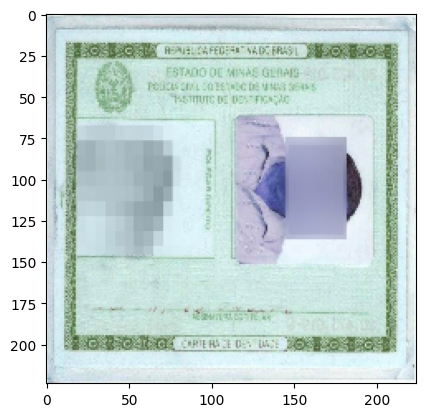

(0.0, 1.0, 0.0, 1.0)

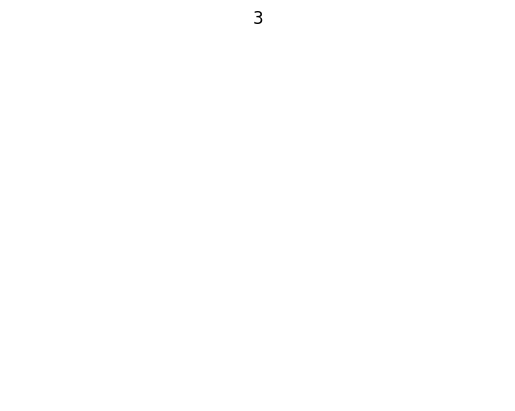

In [ ]:
# Load the test image
img = cv2.imread("00022283_in.jpg")
print(img) 
# Preprocess the image
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = img / 255.0

# Make the prediction
prediction = model1.predict(img)

# Print the predicted class label
predicted_label = np.argmax(prediction)
print('Predicted class:', class_names[predicted_label])
# plot the image
plt.imshow(img[0])
plt.show()
plt.title(predicted_label)
plt.axis("off")

# **Conclusion**

Le plus grand effort dans la création de ce modèle a été de vérifier les techniques qui pourraient être utilisées pour améliorer les mauvaises images qui altéraient considérablement la classification par les couleurs, puisque les images de document les plus sombres ont un histogramme très différent des images claires et nettes. Un autre coût dû aux images sombres était dans le pipeline du prétraitement des images en raison des corrections. Cependant, en utilisation réelle, ces modèles n'auraient pas la même difficulté à cause des photos sombres, puisque les services qui demandent des photos de documents exigent déjà que les photos fournies soient claires, donc dans ce contexte, l'utilisation du modèle 2 pourrait même être plus viable en raison des optimisations qui seraient possibles. Même ainsi, en pratique, ce même pipeline de prétraitement peut être une solution plus robuste que les solutions conventionnelles, car il accepte également les photos floues ou bruyantes.